# **Exploratory Data Analysis with Visualization**


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


In [2]:
# ead the SpaceX dataset into a Pandas dataframe and print its summary
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


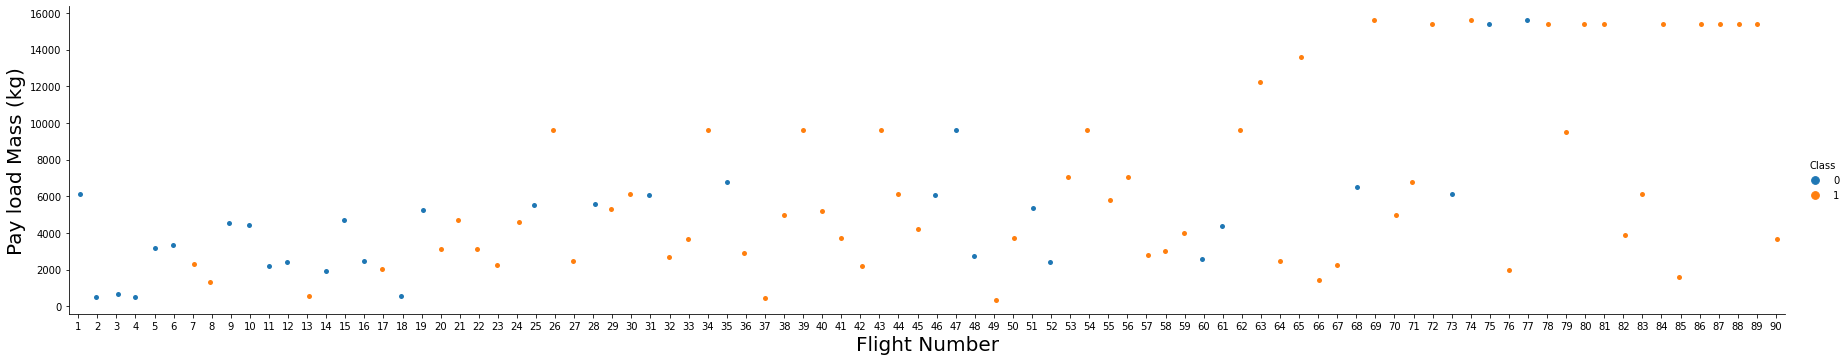

In [3]:
# Plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch.  
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# We see that as the flight number increases, the first stage is more likely to land successfully. 
# The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

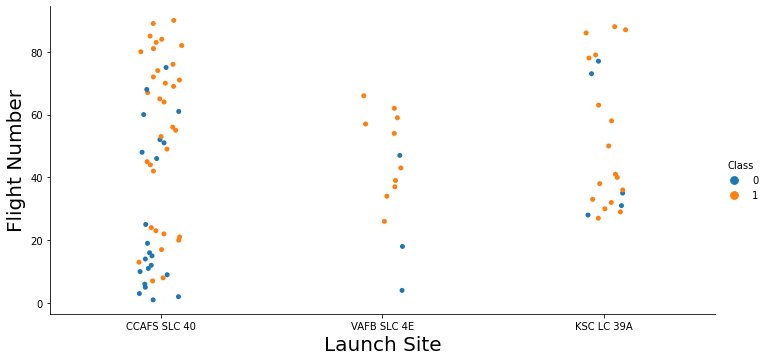

In [4]:
# Visualize the relationship between Flight Number and Launch Site

sns.catplot(y="FlightNumber", x="LaunchSite", hue="Class", data=df, aspect = 2)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Flight Number",fontsize=20)
plt.show()

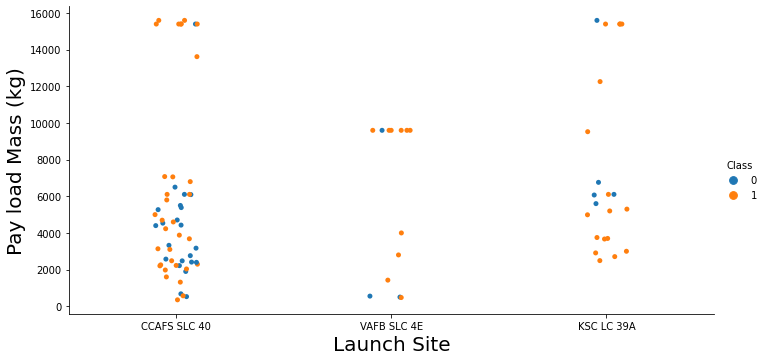

In [5]:
# Visualize the relationship between Payload and Launch Site
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 2)
plt.xlabel("Launch Site",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# there are no rockets launched for heavy payload mass(greater than 10000).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


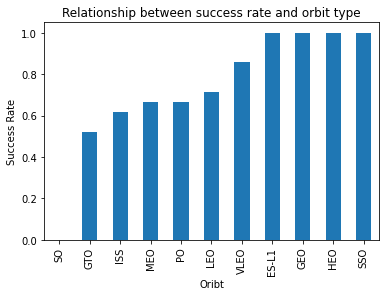

In [6]:
# Visualize the relationship between success rate of each orbit type

df_success_rate_by_orbit = df.groupby(["Orbit"])
df_to_plot = df_success_rate_by_orbit["Orbit","Class"].mean().sort_values('Class')
df_to_plot.plot(kind="bar", legend=False)

plt.title("Relationship between success rate and orbit type")
plt.xlabel("Oribt")
plt.ylabel("Success Rate")

plt.show()

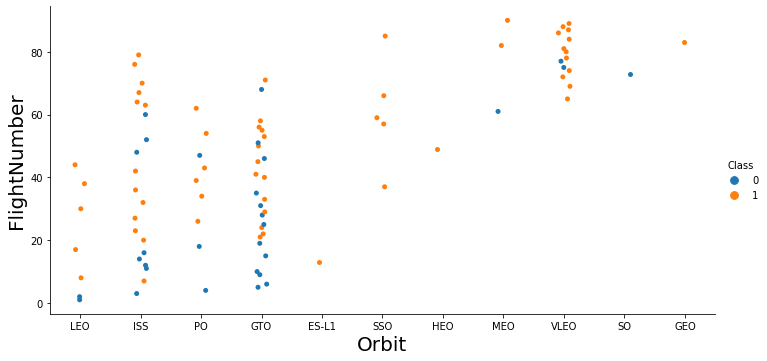

In [7]:
# Visualize the relationship between FlightNumber and Orbit type
sns.catplot(y="FlightNumber", x="Orbit", hue="Class", data=df, aspect = 2)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("FlightNumber",fontsize=20)
plt.show()

# In the LEO orbit the Success appears related to the number of flights; 
# on the other hand, there seems to be no relationship between flight number when in GTO orbit.

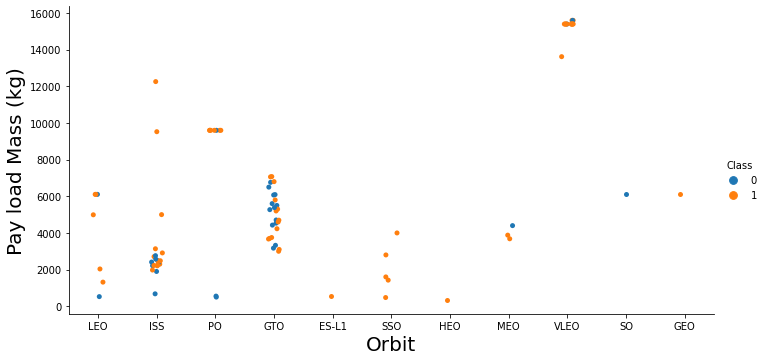

In [8]:
# Visualize the relationship between Payload and Orbit type

sns.catplot(y="PayloadMass", x="Orbit", hue="Class", data=df, aspect = 2)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
# However for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.

In [9]:
# Visualize the launch success yearly trend
  
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year(1)
df["Year"]=year
average_by_year = df.groupby(by="Year").mean()
average_by_year.reset_index(inplace=True)


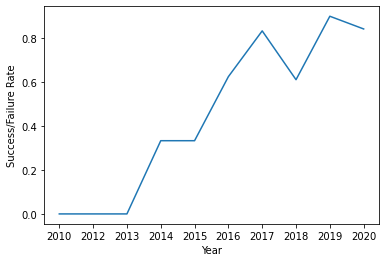

In [10]:
# Visualize the launch success yearly trend
sns.lineplot(y="Class", x="Year", data=average_by_year)
plt.xlabel("Year")
plt.ylabel("Success/Failure Rate")
plt.show()

# Sucess rate since 2013 kept increasing till 2020

## Features Engineering


In [11]:
# Select the features that will be used in success prediction.

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [12]:
# Create dummy variables to categorical columns

features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

# Cast all numeric columns to float64

features_one_hot = features_one_hot.astype('float64')

In [13]:
# Save df

features_one_hot.to_csv('dataset_part_3.csv', index=False)